In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19BehaviorData_CAN_USA.csv to COVID-19BehaviorData_CAN_USA.csv


In [ ]:
df=pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")

## **EDA cross-tabs and chi squares**

Target Variable:i9_health - Are you willing to self-isolate yourself after feeling unwell or having any of the following new symptoms


In [ ]:
#Target: i9_health: would you isolate yourself after feeling unwell or having any of the following new symptoms
target = df['i9_health']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


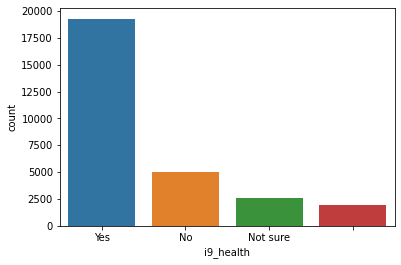

In [ ]:
ax = sns.countplot(target)

Index             AxesSubplot(0.125,0.71587;0.168478x0.16413)
i1_health      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
i2_health      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
i7a_health     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
i13_health       AxesSubplot(0.125,0.518913;0.168478x0.16413)
weight        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
age           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

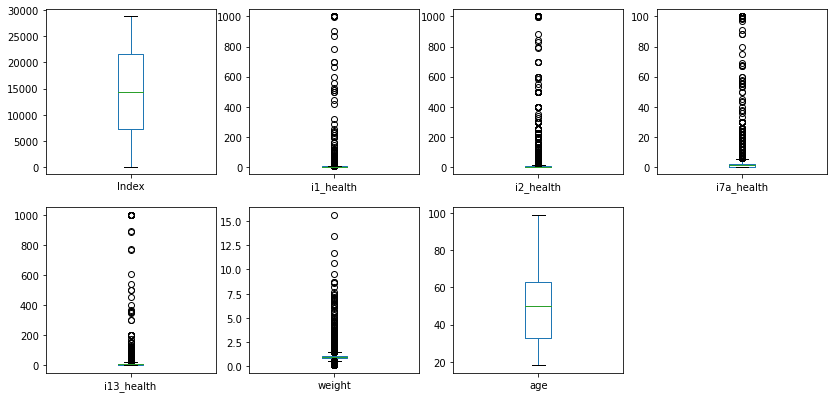

In [ ]:
df.plot(figsize = (14,14), kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)

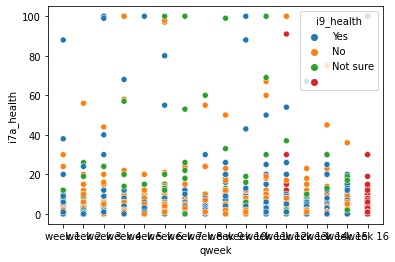

In [ ]:
sns.scatterplot(x = "qweek", y = "i7a_health", hue = target, data = df) #i7a_ health - how many times did you leave your home yesterday?

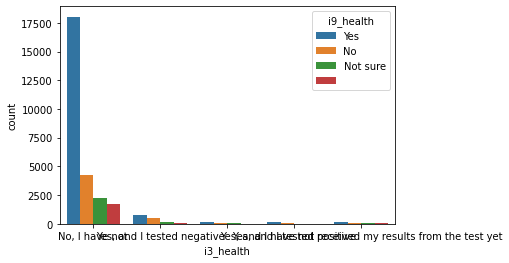

In [ ]:
sns.countplot(x = 'i3_health', hue = target , data = df)

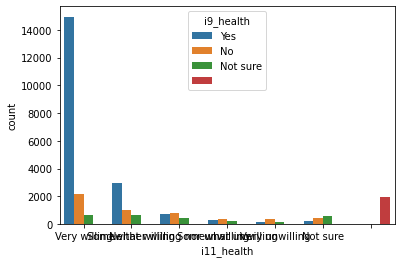

In [ ]:
sns.countplot(x = 'i11_health', hue = target , data = df)

cross tab for columns i3_health ~ i11_health and gender, region_state, household size, household children, employment status[0:18] & [52:66]

In [ ]:
#i3_health: have u tested postive?
target_crosstab_i3 = pd.crosstab(target,df['i3_health'], margins = False)
pd.crosstab(target,df['i3_health'], margins = True)
target_crosstab_i3 = target_crosstab_i3.transpose()
target_crosstab_i3_norm = target_crosstab_i3.div(target_crosstab_i3.sum(axis = 1), axis = 0)
target_crosstab_i3_norm

i9_health,,No,Not sure,Yes
i3_health,,,,
,0.081481,0.232099,0.271605,0.414815
"No, I have not",0.065515,0.163483,0.085147,0.685855
"Yes, and I have not received my results from the test yet",0.111437,0.310850,0.143695,0.434018
"Yes, and I tested negative",0.079208,0.331353,0.095050,0.494389
"Yes, and I tested positive",0.064286,0.214286,0.060714,0.660714


In [ ]:
#i4_health: In the last 7 days, has someone in your household been tested for coronavirus (COVID-19)?
target_crosstab_i4 = pd.crosstab(target,df['i4_health'], margins = False)
pd.crosstab(target,df['i4_health'], margins = True)
target_crosstab_i4 = target_crosstab_i4.transpose()
target_crosstab_i4_norm = target_crosstab_i4.div(target_crosstab_i4.sum(axis = 1), axis = 0)
target_crosstab_i4_norm

i9_health,,No,Not sure,Yes
i4_health,,,,
,0.066511,0.264877,0.264877,0.403734
"No, they have not",0.065021,0.159970,0.069367,0.705641
Not sure,0.068337,0.225513,0.335611,0.370539
"Yes, and they have not received their results from the test yet",0.080808,0.351010,0.116162,0.452020
"Yes, and they tested negative",0.091241,0.279805,0.083333,0.545620
"Yes, and they tested positive",0.073059,0.155251,0.063927,0.707763


In [ ]:
#i5_health_2 : Fever 
target_crosstab_i5_2 = pd.crosstab(target,df['i5_health_2'], margins = False)
pd.crosstab(target,df['i5_health_2'], margins = True)
target_crosstab_i5_2 = target_crosstab_i5_2.transpose()
target_crosstab_i5_2_norm = target_crosstab_i5_2.div(target_crosstab_i5_2.sum(axis = 1), axis = 0)
target_crosstab_i5_2_norm

i9_health,,No,Not sure,Yes
i5_health_2,,,,
,0.076495,0.250348,0.269819,0.403338
No,0.066553,0.172785,0.083879,0.676782
Yes,0.078431,0.222222,0.098039,0.601307


In [ ]:
#i5_health_3: Loss of sense of smell 
target_crosstab_i5_3 = pd.crosstab(target,df['i5_health_3'], margins = False)
pd.crosstab(target,df['i5_health_3'], margins = True)
target_crosstab_i5_3 = target_crosstab_i5_3.transpose()
target_crosstab_i5_3_norm = target_crosstab_i5_3.div(target_crosstab_i5_3.sum(axis = 1), axis = 0)
target_crosstab_i5_3_norm

i9_health,,No,Not sure,Yes
i5_health_3,,,,
,0.076495,0.250348,0.269819,0.403338
No,0.067089,0.171537,0.083761,0.677613
Yes,0.046053,0.298246,0.105263,0.550439


In [ ]:
#i5_health_4: Loss of sense of taste 
target_crosstab_i5_4 = pd.crosstab(target,df['i5_health_4'], margins = False)
pd.crosstab(target,df['i5_health_4'], margins = True)
target_crosstab_i5_4 = target_crosstab_i5_4.transpose()
target_crosstab_i5_4_norm = target_crosstab_i5_4.div(target_crosstab_i5_4.sum(axis = 1), axis = 0)
target_crosstab_i5_4_norm

i9_health,,No,Not sure,Yes
i5_health_4,,,,
,0.076495,0.250348,0.269819,0.403338
No,0.067018,0.171972,0.084035,0.676975
Yes,0.049180,0.278689,0.088993,0.583138


In [ ]:
#i5_health_99: none of symptoms mentioned above 
target_crosstab_i5_99 = pd.crosstab(target,df['i5_health_99'], margins = False)
pd.crosstab(target,df['i5_health_5'], margins = True)
target_crosstab_i5_99 = target_crosstab_i5_99.transpose()
target_crosstab_i5_99_norm = target_crosstab_i5_99.div(target_crosstab_i5_99.sum(axis = 1), axis = 0)
target_crosstab_i5_99_norm

i9_health,,No,Not sure,Yes
i5_health_99,,,,
,0.076495,0.250348,0.269819,0.403338
No,0.072197,0.218510,0.095238,0.614055
Yes,0.066191,0.169006,0.082974,0.681829


In [ ]:
#i10_health: would you self-isolate for 7 days if u have symptoms and be advised by doctors? difficult or easy?
target_crosstab_i10 = pd.crosstab(target,df['i10_health'], margins = False)
pd.crosstab(target,df['i10_health'], margins = True)
target_crosstab_i10 = target_crosstab_i10.transpose()
target_crosstab_i10_norm = target_crosstab_i10.div(target_crosstab_i10.sum(axis = 1), axis = 0)
target_crosstab_i10_norm

i9_health,,No,Not sure,Yes
i10_health,,,,
,1.0,0.000000,0.000000,0.000000
Neither easy nor difficult,0.0,0.300507,0.132513,0.566980
Not sure,0.0,0.379715,0.474434,0.145851
Somewhat difficult,0.0,0.178865,0.118172,0.702963
Somewhat easy,0.0,0.152743,0.074631,0.772626
Very difficult,0.0,0.300873,0.172599,0.526528
Very easy,0.0,0.150868,0.043778,0.805354


In [ ]:
#i11_health: would you self-isolate for 7 days if u have symptoms and be advised by doctors?
target_crosstab_i11 = pd.crosstab(target,df['i11_health'], margins = False)
pd.crosstab(target,df['i11_health'], margins = True)
target_crosstab_i11 = target_crosstab_i11.transpose()
target_crosstab_i11_norm = target_crosstab_i11.div(target_crosstab_i11.sum(axis = 1), axis = 0)
target_crosstab_i11_norm

i9_health,,No,Not sure,Yes
i11_health,,,,
,1.0,0.000000,0.000000,0.000000
Neither willing nor unwilling,0.0,0.397382,0.219372,0.383246
Not sure,0.0,0.370248,0.471901,0.157851
Somewhat unwilling,0.0,0.400248,0.242875,0.356877
Somewhat willing,0.0,0.215489,0.136732,0.647779
Very unwilling,0.0,0.582278,0.180380,0.237342
Very willing,0.0,0.122495,0.035634,0.841871


In [ ]:
#gender
target_crosstab_g = pd.crosstab(target,df['gender'], margins = False)
pd.crosstab(target,df['gender'], margins = True)
target_crosstab_g = target_crosstab_g.transpose()
target_crosstab_gen_norm = target_crosstab_g.div(target_crosstab_g.sum(axis = 1), axis = 0)
target_crosstab_gen_norm

i9_health,,No,Not sure,Yes
gender,,,,
Female,0.069350,0.155512,0.079730,0.695409
Male,0.064167,0.199436,0.099528,0.636869


In [ ]:
#household_size
target_crosstab_h_size = pd.crosstab(target,df['household_size'], margins = False)
pd.crosstab(target,df['household_size'], margins = True)
target_crosstab_h_size = target_crosstab_h_size.transpose()
target_crosstab_h_size_norm = target_crosstab_h_size.div(target_crosstab_h_size.sum(axis = 1), axis = 0)
target_crosstab_h_size_norm

i9_health,,No,Not sure,Yes
household_size,,,,
1,0.068135,0.156804,0.071682,0.703379
2,0.067185,0.139624,0.068095,0.725096
3,0.064418,0.175777,0.075594,0.684211
4,0.064984,0.218695,0.078480,0.637841
5,0.066222,0.226298,0.099095,0.608385
6,0.081201,0.233593,0.109010,0.576196
7,0.065445,0.232984,0.117801,0.583770
8 or more,0.098592,0.232394,0.161972,0.507042
Don't know,0.070381,0.299120,0.504399,0.126100


In [ ]:
#region_state - which area of the UK do u live?
target_crosstab_r_state = pd.crosstab(target,df['region_state'], margins = False)
pd.crosstab(target,df['region_state'], margins = True)
target_crosstab_r_state = target_crosstab_r_state.transpose()
target_crosstab_r_state_norm = target_crosstab_r_state.div(target_crosstab_r_state.sum(axis = 1), axis = 0)
target_crosstab_r_state_norm
# shows the percentage
# probability of getting tested postive goes up as household size goes up

i9_health,,No,Not sure,Yes
region_state,,,,
Alabama,0.045603,0.159609,0.100977,0.693811
Alaska,0.112676,0.140845,0.239437,0.507042
Alberta,0.084274,0.143717,0.079759,0.692250
Arizona,0.050119,0.155131,0.116945,0.677804
Arkansas,0.054795,0.205479,0.123288,0.616438
...,...,...,...,...
Washington,0.075325,0.142857,0.103896,0.677922
West Virginia,0.053571,0.214286,0.116071,0.616071
Wisconsin,0.050157,0.163009,0.084639,0.702194


In [ ]:
#household_children
target_crosstab_h_children = pd.crosstab(target,df['household_children'], margins = False)
pd.crosstab(target,df['household_children'], margins = True)
target_crosstab_h_children = target_crosstab_h_children.transpose()
target_crosstab_h_children_norm = target_crosstab_h_children.div(target_crosstab_h_children.sum(axis = 1), axis = 0)
target_crosstab_h_children_norm

i9_health,,No,Not sure,Yes
household_children,,,,
0,0.065630,0.141661,0.076961,0.715748
1,0.067757,0.200415,0.086189,0.645639
2,0.075737,0.242908,0.092812,0.588543
3,0.059117,0.257835,0.110399,0.572650
4,0.062500,0.297222,0.095833,0.544444
5 or more,0.089219,0.310409,0.133829,0.466543
Don't know,0.051020,0.214286,0.581633,0.153061
Prefer not to say,0.047923,0.169329,0.415335,0.367412


In [ ]:
#employment_status
target_crosstab_e_status = pd.crosstab(target,df['employment_status'], margins = False)
pd.crosstab(target,df['employment_status'], margins = True)
target_crosstab_e_status = target_crosstab_e_status.transpose()
target_crosstab_e_status_norm = target_crosstab_e_status.div(target_crosstab_e_status.sum(axis = 1), axis = 0)
target_crosstab_e_status_norm

i9_health,,No,Not sure,Yes
employment_status,,,,
Full time employment,0.066754,0.192120,0.082058,0.659069
Full time student,0.063033,0.199606,0.109652,0.627708
Not working,0.071594,0.179850,0.092090,0.656467
Other,0.074602,0.180218,0.232188,0.512992
Part time employment,0.070241,0.190024,0.096030,0.643705
Retired,0.069549,0.118512,0.062491,0.749449
Unemployed,0.055103,0.211998,0.089848,0.643051


In [ ]:
# Numerical Variables: 

In [ ]:
#Correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['i9_health_num'] = le.fit_transform(df['i9_health'])
cols = df.select_dtypes(exclude = ['object'])
corr = cols.corr(method = 'pearson')
corr

,Index,i1_health,i2_health,i7a_health,i13_health,weight,age,i9_health_num
Index,1.000000,0.010270,0.040795,0.026403,-0.027342,0.001072,-0.044364,-0.181499
i1_health,0.010270,1.000000,0.297810,0.240526,0.145762,0.041655,-0.035121,-0.021012
i2_health,0.040795,0.297810,1.000000,0.154101,0.120162,0.010599,-0.019492,-0.031289
i7a_health,0.026403,0.240526,0.154101,1.000000,0.116360,0.060663,-0.071895,-0.065798
i13_health,-0.027342,0.145762,0.120162,0.116360,1.000000,-0.002922,-0.001485,-0.008315
weight,0.001072,0.041655,0.010599,0.060663,-0.002922,1.000000,-0.082679,-0.021481
age,-0.044364,-0.035121,-0.019492,-0.071895,-0.001485,-0.082679,1.000000,0.110494
i9_health_num,-0.181499,-0.021012,-0.031289,-0.065798,-0.008315,-0.021481,0.110494,1.000000


In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Index,i1_health,i2_health,i7a_health,i13_health,weight,age,i9_health_num
Index,1.00,0.01,0.04,0.03,-0.03,0.00,-0.04,-0.18
i1_health,0.01,1.00,0.30,0.24,0.15,0.04,-0.04,-0.02
i2_health,0.04,0.30,1.00,0.15,0.12,0.01,-0.02,-0.03
i7a_health,0.03,0.24,0.15,1.00,0.12,0.06,-0.07,-0.07
i13_health,-0.03,0.15,0.12,0.12,1.00,-0.00,-0.00,-0.01
weight,0.00,0.04,0.01,0.06,-0.00,1.00,-0.08,-0.02
age,-0.04,-0.04,-0.02,-0.07,-0.00,-0.08,1.00,0.11
i9_health_num,-0.18,-0.02,-0.03,-0.07,-0.01,-0.02,0.11,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ceafe9d0>,
      dtype=object)

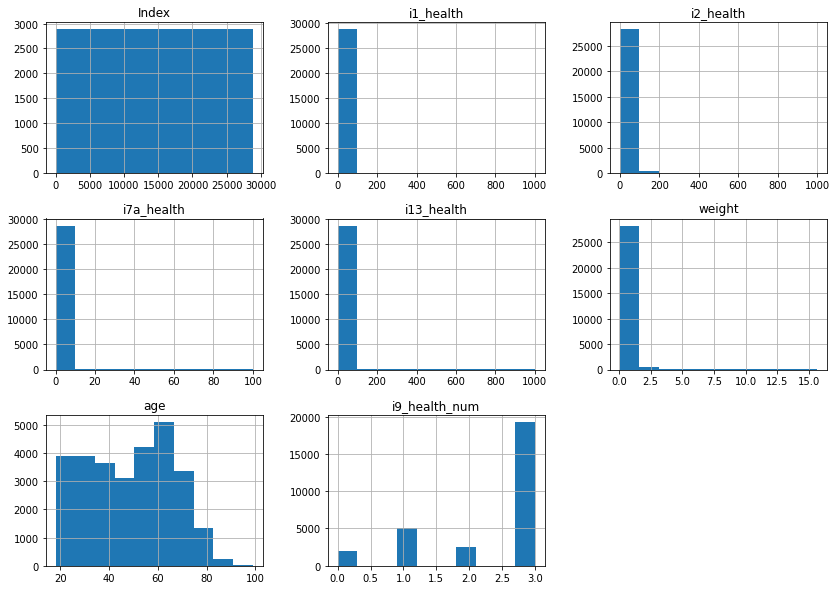

In [ ]:
df.hist(figsize=(14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59cff17950>,
      dtype=object)

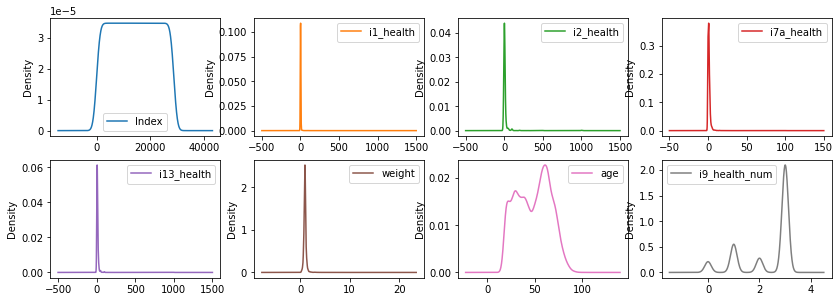

In [ ]:
df.plot(figsize = (14,10), kind = 'density', subplots = True, layout = (4,4), sharex = False)

#### chi-square results for i3-i11 columns:

In [ ]:
df= pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
subset1 = df.iloc[:,np.r_[0:22,72:79]]
subset1 = subset1.replace(r'^\s*$', np.nan, regex=True)
subset1 = subset1.drop(columns=['i5a_health', 'i6_health','i7b_health','i8_health'])
categorical_cols = subset1.iloc[:,np.r_[4,7:18,19,21,22,24]]

predictors = categorical_cols.columns.tolist()[1:]

for item in predictors:
    table = pd.crosstab(categorical_cols['i9_health'], categorical_cols[item])
    chi2, p, dof, expected = chi2_contingency(table.values)
    print(item + ': ' + 'Chi-square Statistic is %0.3f and p_value is % 0.3f' % (chi2, p))

i3_health: Chi-square Statistic is 401.362 and p_value is  0.000
i4_health: Chi-square Statistic is 1585.465 and p_value is  0.000
i5_health_1: Chi-square Statistic is 0.269 and p_value is  0.874
i5_health_2: Chi-square Statistic is 11.311 and p_value is  0.003
i5_health_3: Chi-square Statistic is 53.320 and p_value is  0.000
i5_health_4: Chi-square Statistic is 32.447 and p_value is  0.000
i5_health_5: Chi-square Statistic is 3.228 and p_value is  0.199
i5_health_99: Chi-square Statistic is 53.836 and p_value is  0.000
i9_health: Chi-square Statistic is 53788.000 and p_value is  0.000
i10_health: Chi-square Statistic is 3818.627 and p_value is  0.000
i11_health: Chi-square Statistic is 6482.055 and p_value is  0.000
gender: Chi-square Statistic is 146.508 and p_value is  0.000
region_state: Chi-square Statistic is 504.059 and p_value is  0.000
household_size: Chi-square Statistic is 1982.657 and p_value is  0.000
employment_status: Chi-square Statistic is 645.119 and p_value is  0.000

#### chi-square results for i12 columns:

In [ ]:
df= pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
predictors1 = df.columns.tolist()[22:43]

for item in predictors1:
    table = pd.crosstab(df['i9_health'], df[item])
    chi2, p, dof, expected = chi2_contingency(table.values)
    print(item + ': ' + 'Chi-square Statistic of %0.3f p_value % 0.3f' % (chi2, p))

i12_health_1: Chi-square Statistic of 941.534 p_value  0.000
i12_health_2: Chi-square Statistic of 1829.253 p_value  0.000
i12_health_3: Chi-square Statistic of 602.418 p_value  0.000
i12_health_4: Chi-square Statistic of 1989.911 p_value  0.000
i12_health_5: Chi-square Statistic of 2110.134 p_value  0.000
i12_health_6: Chi-square Statistic of 1540.660 p_value  0.000
i12_health_7: Chi-square Statistic of 998.598 p_value  0.000
i12_health_8: Chi-square Statistic of 1498.323 p_value  0.000
i12_health_9: Chi-square Statistic of 374.419 p_value  0.000
i12_health_10: Chi-square Statistic of 1190.993 p_value  0.000
i12_health_11: Chi-square Statistic of 1903.171 p_value  0.000
i12_health_12: Chi-square Statistic of 1245.168 p_value  0.000
i12_health_13: Chi-square Statistic of 1715.542 p_value  0.000
i12_health_14: Chi-square Statistic of 2643.181 p_value  0.000
i12_health_15: Chi-square Statistic of 2394.142 p_value  0.000
i12_health_16: Chi-square Statistic of 1671.104 p_value  0.000
i12_h

####  Variables Crosstab (no imputation)

In [ ]:
df.columns

Index(['Index', 'RecordNo', 'endtime', 'qweek', 'i1_health', 'i2_health',
       'i7a_health', 'i3_health', 'i4_health', 'i5_health_1', 'i5_health_2',
       'i5_health_3', 'i5_health_4', 'i5_health_5', 'i5_health_99',
       'i5a_health', 'i6_health', 'i7b_health', 'i8_health', 'i9_health',
       'i10_health', 'i11_health', 'i12_health_1', 'i12_health_2',
       'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6',
       'i12_health_7', 'i12_health_8', 'i12_health_9', 'i12_health_10',
       'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
       'i12_health_15', 'i12_health_16', 'i12_health_17', 'i12_health_18',
       'i12_health_19', 'i12_health_20', 'i13_health', 'i14_health_1',
       'i14_health_2', 'i14_health_3', 'i14_health_4', 'i14_health_5',
       'i14_health_6', 'i14_health_7', 'i14_health_8', 'i14_health_9',
       'i14_health_10', 'i14_health_96', 'i14_health_98', 'i14_health_99',
       'i14_health_other', 'd1_health_1', 'd1_health_2', 'd

In [ ]:
predictors_1 = df.columns.tolist()[9:35]
predictors_1

['i5_health_1',
 'i5_health_2',
 'i5_health_3',
 'i5_health_4',
 'i5_health_5',
 'i5_health_99',
 'i5a_health',
 'i6_health',
 'i7b_health',
 'i8_health',
 'i9_health',
 'i10_health',
 'i11_health',
 'i12_health_1',
 'i12_health_2',
 'i12_health_3',
 'i12_health_4',
 'i12_health_5',
 'i12_health_6',
 'i12_health_7',
 'i12_health_8',
 'i12_health_9',
 'i12_health_10',
 'i12_health_11',
 'i12_health_12',
 'i12_health_13']

i5_health_1                  No       Yes
i9_health                                
             0.028483  0.923356  0.048162
No           0.035580  0.920340  0.044080
Not sure     0.075841  0.883112  0.041048
Yes          0.015044  0.939047  0.045910 



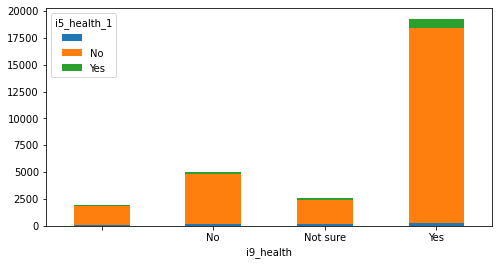

i5_health_2                  No       Yes
i9_health                                
             0.028483  0.952874  0.018643
No           0.035580  0.944258  0.020162
Not sure     0.075841  0.906568  0.017592
Yes          0.015044  0.970639  0.014318 



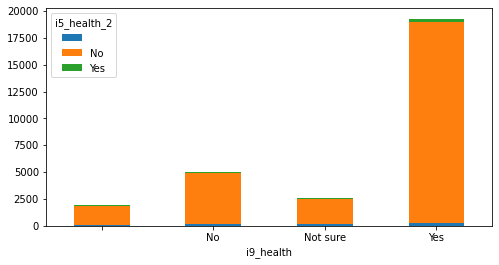

i5_health_3                  No       Yes
i9_health                                
             0.028483  0.960642  0.010875
No           0.035580  0.937537  0.026883
Not sure     0.075841  0.905395  0.018765
Yes          0.015044  0.971935  0.013021 



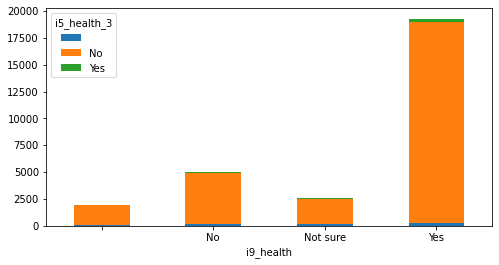

i5_health_4                  No       Yes
i9_health                                
             0.028483  0.960642  0.010875
No           0.035580  0.940897  0.023522
Not sure     0.075841  0.909304  0.014855
Yes          0.015044  0.972039  0.012917 



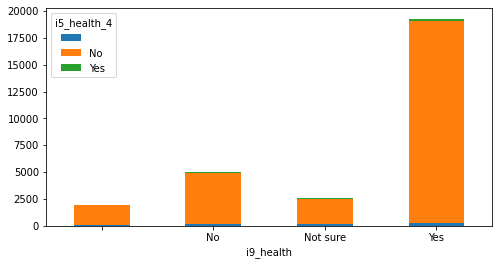

i5_health_5                  No       Yes
i9_health                                
             0.028483  0.935267  0.036251
No           0.035580  0.930421  0.033999
Not sure     0.075841  0.891321  0.032838
Yes          0.015044  0.954453  0.030503 



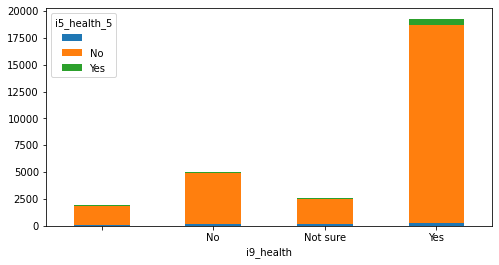

i5_health_99                  No       Yes
i9_health                                 
              0.028483  0.097359  0.874158
No            0.035580  0.112473  0.851947
Not sure      0.075841  0.096951  0.827209
Yes           0.015044  0.082949  0.902008 



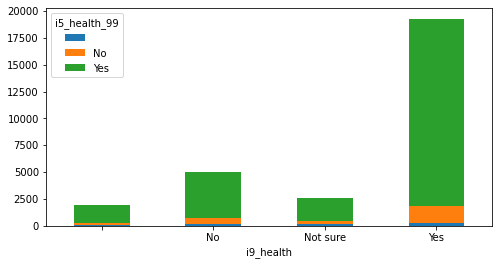

i5a_health                  No  Not sure       Yes
i9_health                                         
            0.902641  0.065251  0.015018  0.017090
No          0.887527  0.070765  0.017197  0.024511
Not sure    0.902658  0.051603  0.035184  0.010555
Yes         0.917000  0.045910  0.017741  0.019349 



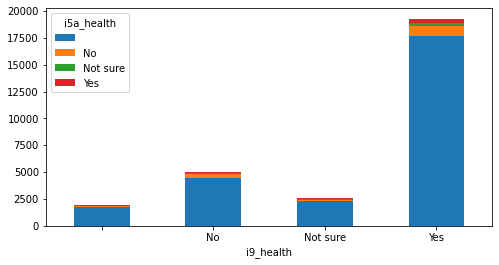

i6_health              Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                                 
           0.902641  0.031590    0.024340    0.019161  0.009839   0.012429
No         0.887527  0.026487    0.029848    0.018778  0.008895   0.028464
Not sure   0.902658  0.015637    0.022674    0.028929  0.014073   0.016028
Yes        0.917000  0.034860    0.025990    0.010531  0.003528   0.008093 



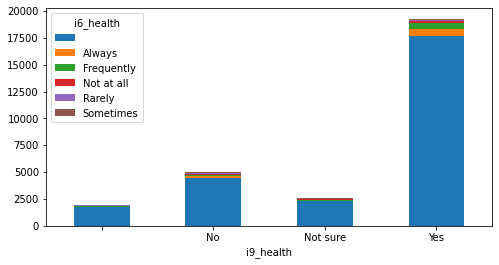

i7b_health                  No       Yes
i9_health                               
            1.000000  0.000000  0.000000
No          0.894446  0.075311  0.030243
Not sure    0.915559  0.070758  0.013683
Yes         0.918763  0.058619  0.022618 



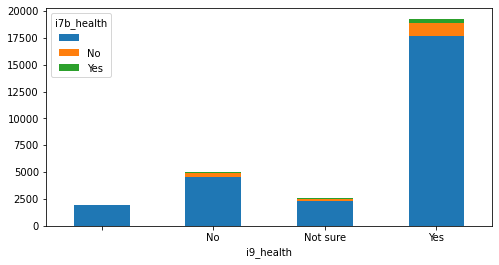

i8_health                  No  Not sure       Yes
i9_health                                        
           1.000000  0.000000  0.000000  0.000000
No         0.895236  0.075114  0.015220  0.014430
Not sure   0.910086  0.046912  0.035966  0.007037
Yes        0.921876  0.051616  0.009286  0.017223 



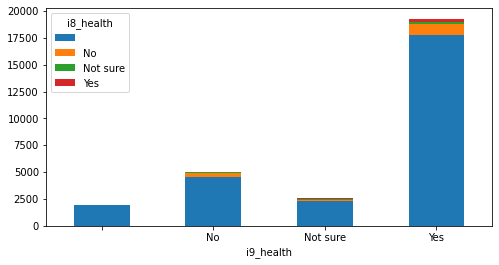

i9_health        No  Not sure  Yes
i9_health                         
           1.0  0.0       0.0  0.0
No         0.0  1.0       0.0  0.0
Not sure   0.0  0.0       1.0  0.0
Yes        0.0  0.0       0.0  1.0 



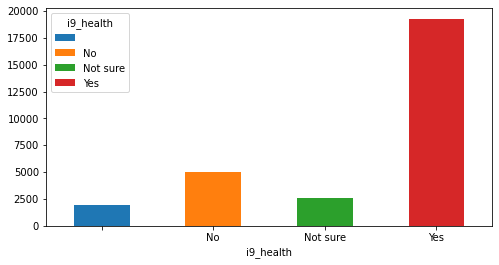

i10_health       Neither easy nor difficult  ...  Very difficult  Very easy
i9_health                                    ...                           
            1.0                    0.000000  ...        0.000000   0.000000
No          0.0                    0.164064  ...        0.088555   0.341965
Not sure    0.0                    0.143081  ...        0.100469   0.196247
Yes         0.0                    0.081237  ...        0.040670   0.479068

[4 rows x 7 columns] 



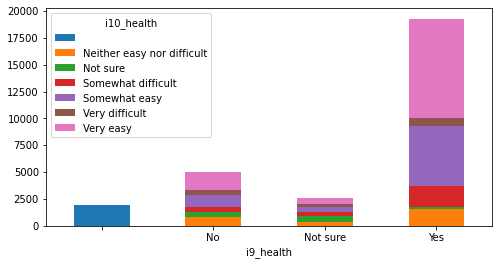

i11_health       Neither willing nor unwilling  ...  Very unwilling  Very willing
i9_health                                       ...                              
            1.0                       0.000000  ...        0.000000      0.000000
No          0.0                       0.150030  ...        0.072742      0.430125
Not sure    0.0                       0.163800  ...        0.044566      0.247459
Yes         0.0                       0.037973  ...        0.007781      0.775795

[4 rows x 7 columns] 



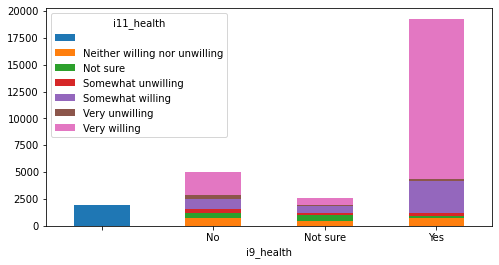

i12_health_1    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.745728    0.100984    0.073537  0.025893   0.053858
No            0.479146    0.164064    0.169006  0.068788   0.118996
Not sure      0.354574    0.143081    0.272478  0.090696   0.139171
Yes           0.527624    0.133838    0.209939  0.053795   0.074804 



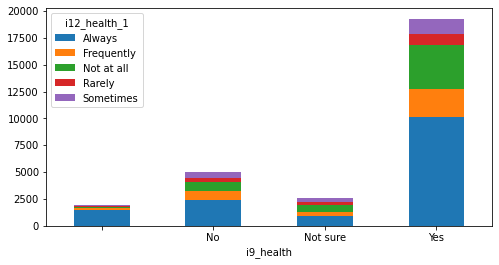

i12_health_2    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.696530    0.216468    0.018643  0.012947   0.055412
No            0.661198    0.185412    0.038545  0.030243   0.084602
Not sure      0.512510    0.235731    0.094996  0.037138   0.119625
Yes           0.744774    0.208072    0.008196  0.005966   0.032993 



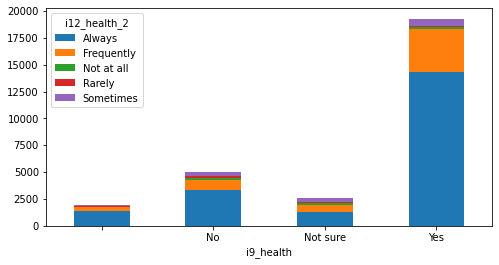

i12_health_3    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.527706    0.265148    0.052822  0.040911   0.113413
No            0.498122    0.221783    0.085985  0.053173   0.140937
Not sure      0.338937    0.227131    0.154418  0.082095   0.197420
Yes           0.490844    0.276080    0.066556  0.045080   0.121440 



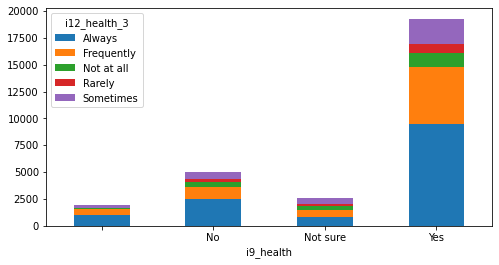

i12_health_4    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.836872    0.086484    0.027447  0.007768   0.041429
No            0.669105    0.141332    0.062068  0.041510   0.085985
Not sure      0.611024    0.143081    0.115324  0.033620   0.096951
Yes           0.849458    0.099497    0.018727  0.007989   0.024330 



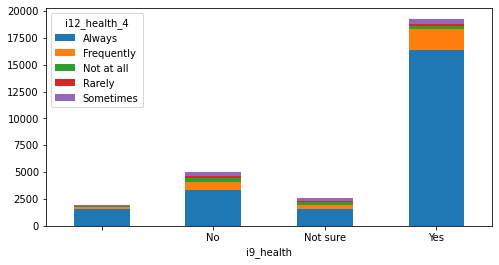

i12_health_5    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.695495    0.106680    0.105127  0.026929   0.065769
No            0.586875    0.131647    0.141530  0.044673   0.095276
Not sure      0.460125    0.141517    0.209148  0.061376   0.127834
Yes           0.796026    0.088759    0.063236  0.013799   0.038180 



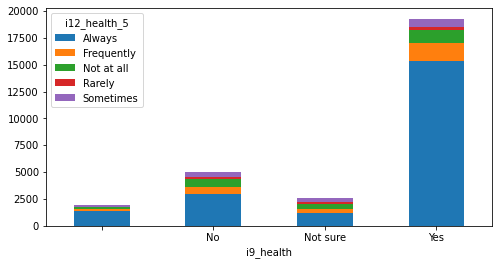

i12_health_6    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.207147    0.284827    0.168824  0.102020   0.237183
No            0.293932    0.237399    0.171378  0.093497   0.203795
Not sure      0.176701    0.198593    0.275215  0.114543   0.234949
Yes           0.276184    0.379468    0.083830  0.066089   0.194429 



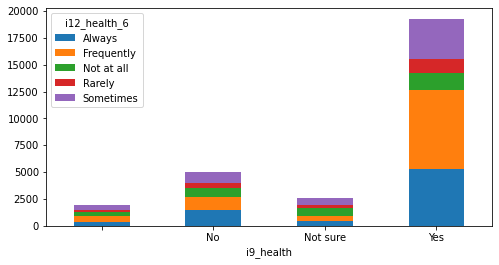

i12_health_7    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.417400    0.171414    0.227861  0.067840   0.115484
No            0.466298    0.152006    0.187191  0.065626   0.128879
Not sure      0.378812    0.145035    0.275606  0.060594   0.139953
Yes           0.604036    0.140634    0.143643  0.033978   0.077709 



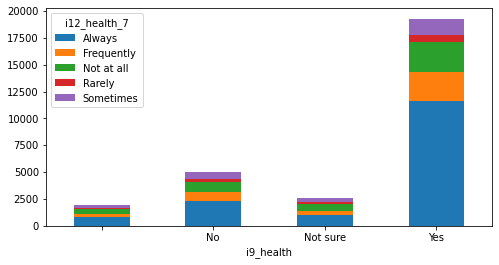

i12_health_8    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                          
              0.640083    0.091144    0.164682  0.034697   0.069394
No            0.571259    0.117019    0.168017  0.047638   0.096066
Not sure      0.511728    0.094996    0.238077  0.049648   0.105551
Yes           0.775069    0.066297    0.096592  0.019453   0.042590 



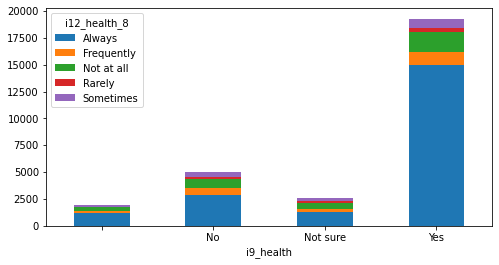

i12_health_9              Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                                    
              0.574314  0.097359    0.044537    0.207664  0.035733   0.040394
No            0.539435  0.143704    0.067998    0.139553  0.043289   0.066021
Not sure      0.593823  0.073495    0.044957    0.198202  0.032447   0.057076
Yes           0.586606  0.155211    0.051823    0.133631  0.030658   0.042071 



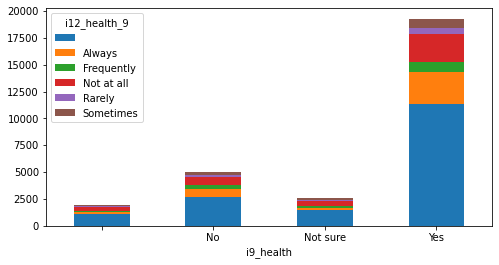

i12_health_10              Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                                     
               0.631279  0.108234    0.030036    0.174521  0.024340   0.031590
No             0.526191  0.220004    0.067800    0.108519  0.023918   0.053568
Not sure       0.622752  0.143081    0.047303    0.120797  0.017592   0.048475
Yes            0.685013  0.197904    0.025575    0.067075  0.007678   0.016756 



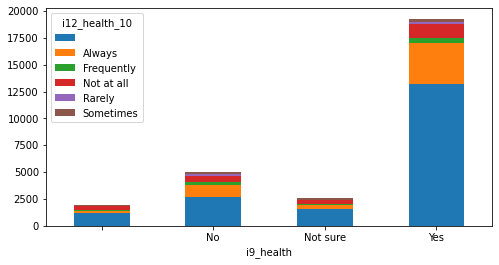

i12_health_11    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                           
               0.352667    0.247022    0.154842  0.087002   0.158467
No             0.423997    0.187586    0.170192  0.076300   0.141925
Not sure       0.313526    0.167709    0.254496  0.088741   0.175528
Yes            0.574259    0.215801    0.071692  0.040566   0.097681 



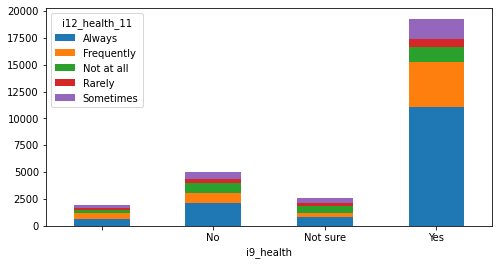

i12_health_12    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                           
               0.313827    0.214397    0.185396  0.103573   0.182807
No             0.390591    0.188772    0.176912  0.085392   0.158332
Not sure       0.258405    0.178264    0.292025  0.094605   0.176701
Yes            0.479224    0.221922    0.100949  0.069357   0.128547 



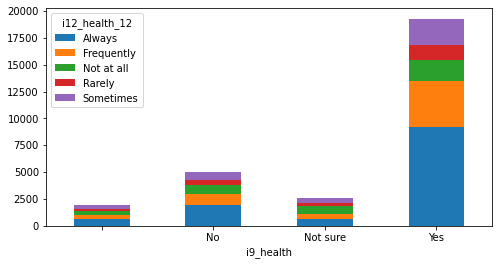

i12_health_13    Always  Frequently  Not at all    Rarely  Sometimes
i9_health                                                           
               0.430347    0.209736    0.139306  0.065769   0.154842
No             0.448705    0.176517    0.158134  0.068393   0.148251
Not sure       0.320563    0.172009    0.248241  0.089914   0.169273
Yes            0.603154    0.184884    0.068268  0.040100   0.103595 



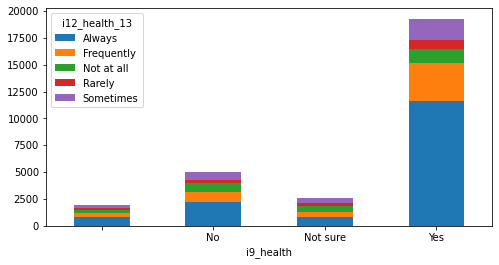

i14_health_1                  No       Yes
i9_health                                 
              0.574314  0.390989  0.034697
No            0.539435  0.418660  0.041906
Not sure      0.593823  0.372557  0.033620
Yes           0.586606  0.385745  0.027650 



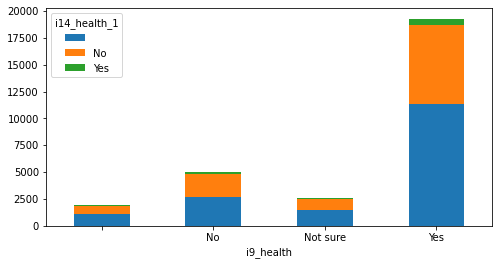

i14_health_2                  No       Yes
i9_health                                 
              0.574314  0.405489  0.020197
No            0.539435  0.431311  0.029255
Not sure      0.593823  0.386630  0.019547
Yes           0.586606  0.399699  0.013695 



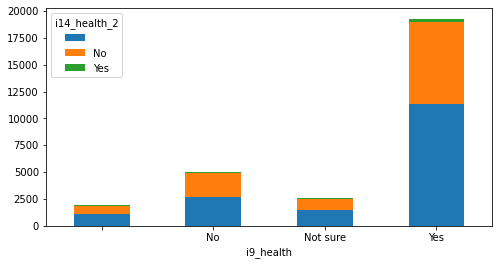

i14_health_3                  No       Yes
i9_health                                 
              0.574314  0.388918  0.036769
No            0.539435  0.402056  0.058510
Not sure      0.593823  0.367475  0.038702
Yes           0.586606  0.384396  0.028998 



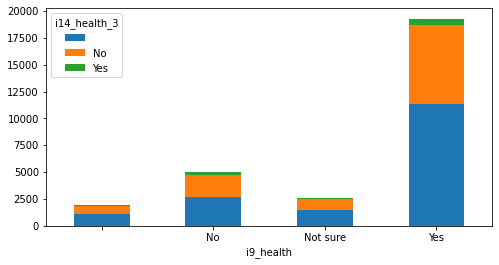

i14_health_4                  No       Yes
i9_health                                 
              0.574314  0.382185  0.043501
No            0.539435  0.408974  0.051591
Not sure      0.593823  0.371384  0.034793
Yes           0.586606  0.376355  0.037039 



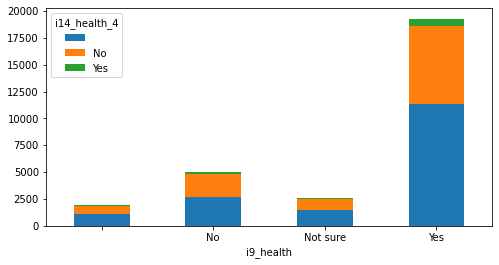

i14_health_5                  No       Yes
i9_health                                 
              0.574314  0.406007  0.019679
No            0.539435  0.436648  0.023918
Not sure      0.593823  0.383894  0.022283
Yes           0.586606  0.399077  0.014318 



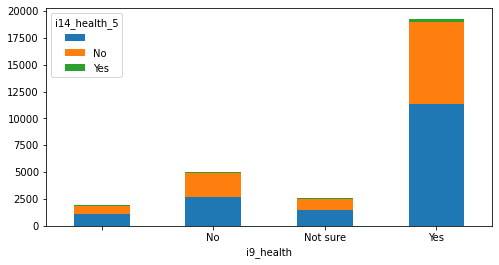

i14_health_6                  No       Yes
i9_health                                 
              0.574314  0.397204  0.028483
No            0.539435  0.420834  0.039731
Not sure      0.593823  0.372557  0.033620
Yes           0.586606  0.391088  0.022306 



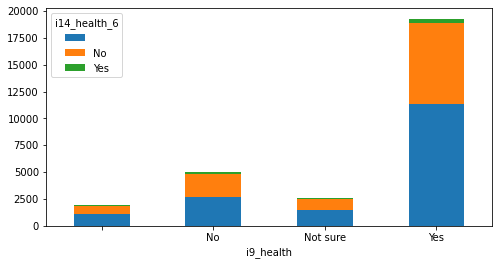

i14_health_7                  No       Yes
i9_health                                 
              0.574314  0.422061  0.003625
No            0.539435  0.450880  0.009686
Not sure      0.593823  0.399922  0.006255
Yes           0.586606  0.408103  0.005291 



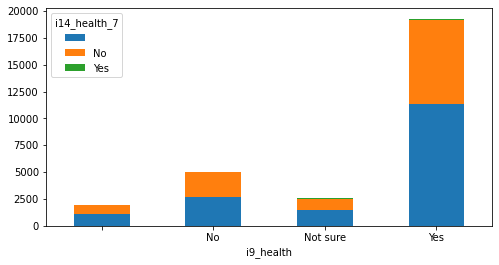

i14_health_8                  No       Yes
i9_health                                 
              0.574314  0.413257  0.012429
No            0.539435  0.443368  0.017197
Not sure      0.593823  0.398358  0.007819
Yes           0.586606  0.406495  0.006899 



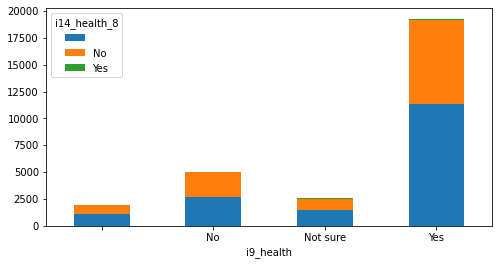

i14_health_9                  No       Yes
i9_health                                 
              0.574314  0.390471  0.035215
No            0.539435  0.434671  0.025894
Not sure      0.593823  0.392103  0.014073
Yes           0.586606  0.399647  0.013747 



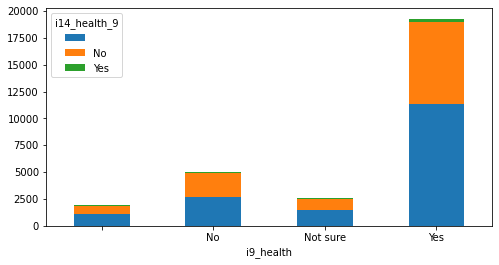

i14_health_10                  No       Yes
i9_health                                  
               0.574314  0.414293  0.011393
No             0.539435  0.444357  0.016209
Not sure       0.593823  0.398749  0.007428
Yes            0.586606  0.405198  0.008196 



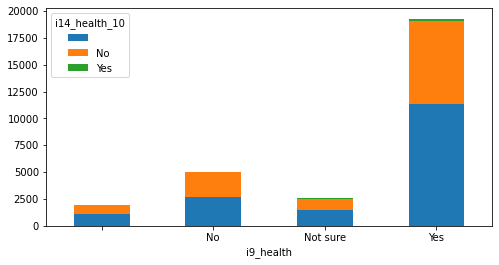

i14_health_96                  No       Yes
i9_health                                  
               0.574314  0.338685  0.087002
No             0.539435  0.399091  0.061475
Not sure       0.593823  0.325254  0.080923
Yes            0.586606  0.335893  0.077502 



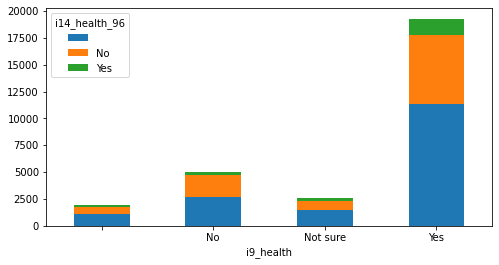

i14_health_98                  No       Yes
i9_health                                  
               0.574314  0.398757  0.026929
No             0.539435  0.428543  0.032022
Not sure       0.593823  0.350274  0.055903
Yes            0.586606  0.396742  0.016652 



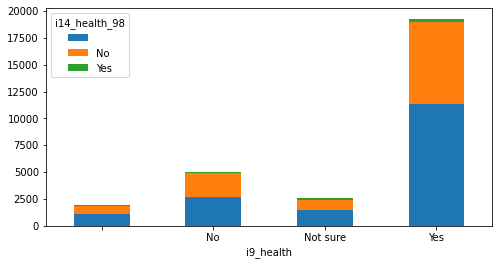

d1_health_1                  No       Yes
i9_health                                
             0.157431  0.621958  0.220611
No           0.104171  0.767345  0.128484
Not sure     0.111024  0.747459  0.141517
Yes          0.087721  0.706853  0.205426 



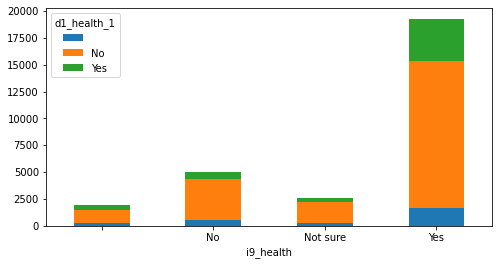

d1_health_2                  No       Yes
i9_health                                
             0.157431  0.720870  0.121699
No           0.104171  0.801542  0.094287
Not sure     0.111024  0.804144  0.084832
Yes          0.087721  0.794470  0.117809 



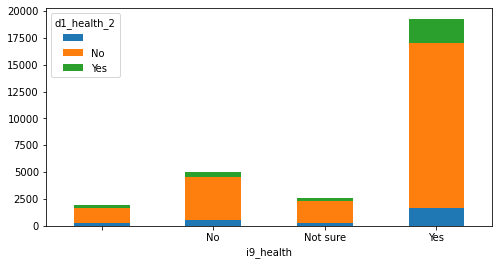

d1_health_3                  No       Yes
i9_health                                
             0.157431  0.786639  0.055930
No           0.104171  0.859458  0.036371
Not sure     0.111024  0.851837  0.037138
Yes          0.087721  0.856046  0.056233 



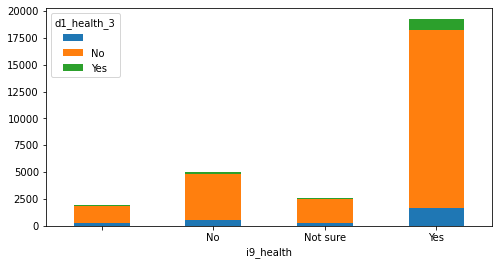

d1_health_4                  No       Yes
i9_health                                
             0.157431  0.837908  0.004661
No           0.104171  0.886144  0.009686
Not sure     0.111024  0.879593  0.009382
Yes          0.087721  0.907506  0.004773 



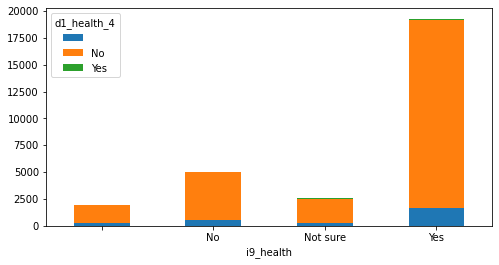

d1_health_5                  No       Yes
i9_health                                
             0.157431  0.804764  0.037804
No           0.104171  0.864795  0.031034
Not sure     0.111024  0.853792  0.035184
Yes          0.087721  0.866525  0.045754 



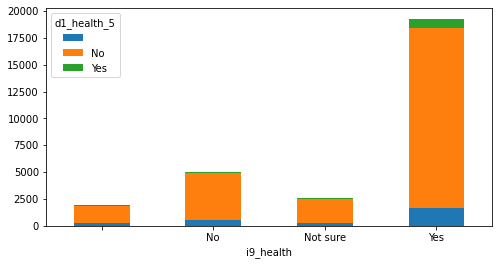

d1_health_6                  No       Yes
i9_health                                
             0.157431  0.729156  0.113413
No           0.104171  0.795414  0.100415
Not sure     0.111024  0.793589  0.095387
Yes          0.087721  0.796441  0.115838 



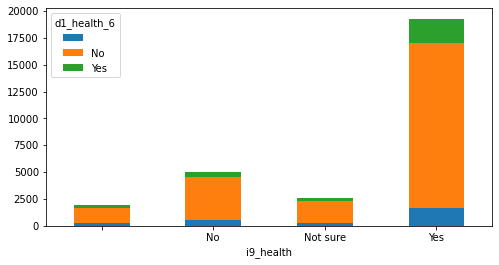

d1_health_7                  No       Yes
i9_health                                
             0.157431  0.830658  0.011911
No           0.104171  0.880016  0.015813
Not sure     0.111024  0.870993  0.017983
Yes          0.087721  0.902630  0.009649 



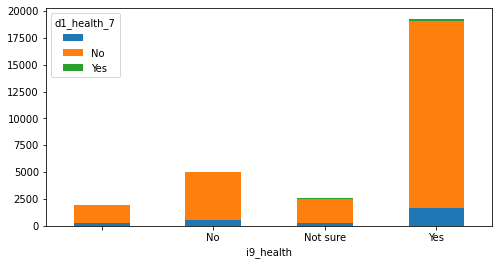

d1_health_8                  No       Yes
i9_health                                
             0.157431  0.788193  0.054376
No           0.104171  0.858865  0.036964
Not sure     0.111024  0.849101  0.039875
Yes          0.087721  0.858847  0.053432 



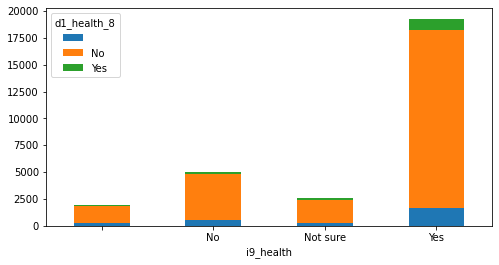

d1_health_9                  No       Yes
i9_health                                
             0.157431  0.595028  0.247540
No           0.104171  0.720300  0.175529
Not sure     0.111024  0.702111  0.186865
Yes          0.087721  0.642164  0.270115 



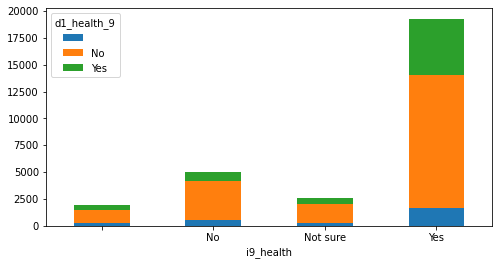

d1_health_10                  No       Yes
i9_health                                 
              0.157431  0.668566  0.174003
No            0.104171  0.772287  0.123542
Not sure      0.111024  0.763487  0.125489
Yes           0.087721  0.719562  0.192717 



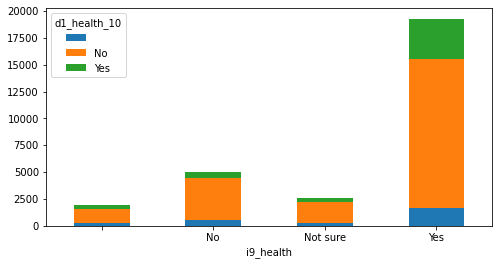

d1_health_11                  No       Yes
i9_health                                 
              0.157431  0.833765  0.008804
No            0.104171  0.884562  0.011267
Not sure      0.111024  0.882721  0.006255
Yes           0.087721  0.904913  0.007366 



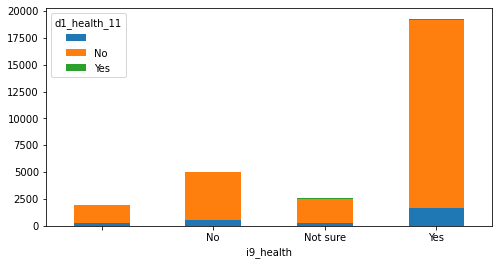

d1_health_12                  No       Yes
i9_health                                 
              0.157431  0.707923  0.134645
No            0.104171  0.818739  0.077090
Not sure      0.111024  0.793980  0.094996
Yes           0.087721  0.783213  0.129066 



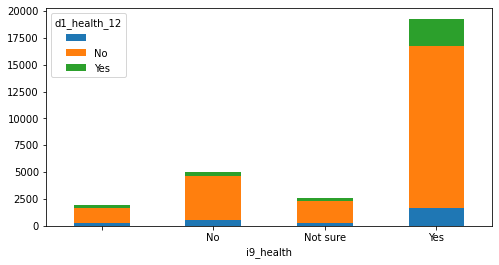

d1_health_13                  No       Yes
i9_health                                 
              0.157431  0.834801  0.007768
No            0.104171  0.885946  0.009883
Not sure      0.111024  0.881157  0.007819
Yes           0.087721  0.904083  0.008196 



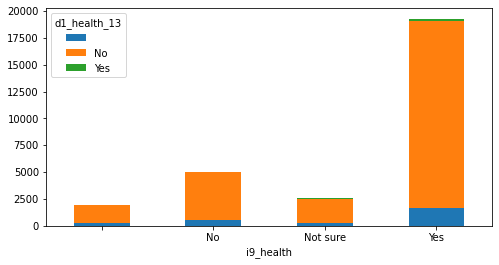

d1_health_98                  No       Yes
i9_health                                 
              0.157431  0.822372  0.020197
No            0.104171  0.875865  0.019964
Not sure      0.111024  0.851837  0.037138
Yes           0.087721  0.894382  0.017897 



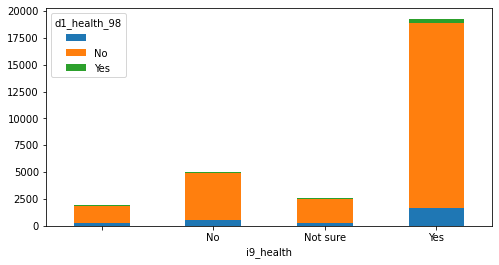

In [ ]:
predictors_1 = df.columns.tolist()[9:35]
predictors_2 = df.columns.tolist()[43:55]
predictors_3 = df.columns.tolist()[57:72]
predictors=predictors_1+predictors_2+predictors_3 #excluding i14_health_other

for i in predictors:
    crosstab =pd.crosstab(df['i9_health'],df[i], margins = False)
    #print(crosstab,"\n")
    crosstab_ratio = crosstab.div(crosstab.sum(axis = 1), axis = 0)
    print(crosstab_ratio,"\n")
    crosstab.plot(kind='bar', stacked=True, rot=0, figsize=(8,4))
    plt.show()

i14 & d1 Variables Chi Square Test

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
predictors = df.columns.tolist()[43:72]
predictors

['i14_health_1',
 'i14_health_2',
 'i14_health_3',
 'i14_health_4',
 'i14_health_5',
 'i14_health_6',
 'i14_health_7',
 'i14_health_8',
 'i14_health_9',
 'i14_health_10',
 'i14_health_96',
 'i14_health_98',
 'i14_health_99',
 'i14_health_other',
 'd1_health_1',
 'd1_health_2',
 'd1_health_3',
 'd1_health_4',
 'd1_health_5',
 'd1_health_6',
 'd1_health_7',
 'd1_health_8',
 'd1_health_9',
 'd1_health_10',
 'd1_health_11',
 'd1_health_12',
 'd1_health_13',
 'd1_health_98',
 'd1_health_99']

In [ ]:
predictors = df.columns.tolist()[43:72]

for item in predictors:
    table = pd.crosstab(df['i9_health'], df[item])
    chi2, p, dof, expected = chi2_contingency(table.values)
    print(item + ': ' + 'Chi-square Statistic of %0.3f p_value % 0.3f' % (chi2, p))

i14_health_1: Chi-square Statistic of 57.774 p_value  0.000
i14_health_2: Chi-square Statistic of 86.425 p_value  0.000
i14_health_3: Chi-square Statistic of 121.510 p_value  0.000
i14_health_4: Chi-square Statistic of 52.258 p_value  0.000
i14_health_5: Chi-square Statistic of 60.938 p_value  0.000
i14_health_6: Chi-square Statistic of 79.980 p_value  0.000
i14_health_7: Chi-square Statistic of 50.901 p_value  0.000
i14_health_8: Chi-square Statistic of 80.432 p_value  0.000
i14_health_9: Chi-square Statistic of 103.886 p_value  0.000
i14_health_10: Chi-square Statistic of 61.138 p_value  0.000
i14_health_96: Chi-square Statistic of 85.529 p_value  0.000
i14_health_98: Chi-square Statistic of 212.387 p_value  0.000
i14_health_99: Chi-square Statistic of 284.372 p_value  0.000
i14_health_other: Chi-square Statistic of 4237.825 p_value  0.062
d1_health_1: Chi-square Statistic of 312.938 p_value  0.000
d1_health_2: Chi-square Statistic of 149.387 p_value  0.000
d1_health_3: Chi-square St

In [ ]:
df.columns

Index(['Index', 'RecordNo', 'endtime', 'qweek', 'i1_health', 'i2_health',
       'i7a_health', 'i3_health', 'i4_health', 'i5_health_1', 'i5_health_2',
       'i5_health_3', 'i5_health_4', 'i5_health_5', 'i5_health_99',
       'i5a_health', 'i6_health', 'i7b_health', 'i8_health', 'i9_health',
       'i10_health', 'i11_health', 'i12_health_1', 'i12_health_2',
       'i12_health_3', 'i12_health_4', 'i12_health_5', 'i12_health_6',
       'i12_health_7', 'i12_health_8', 'i12_health_9', 'i12_health_10',
       'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_14',
       'i12_health_15', 'i12_health_16', 'i12_health_17', 'i12_health_18',
       'i12_health_19', 'i12_health_20', 'i13_health', 'i14_health_1',
       'i14_health_2', 'i14_health_3', 'i14_health_4', 'i14_health_5',
       'i14_health_6', 'i14_health_7', 'i14_health_8', 'i14_health_9',
       'i14_health_10', 'i14_health_96', 'i14_health_98', 'i14_health_99',
       'i14_health_other', 'd1_health_1', 'd1_health_2', 'd

## Cleaning missing values and outliers

In [ ]:
#replace blank entries with na
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
pd.options.display.max_rows = 100
df.isna().sum()

In [ ]:
#log transform the numeric columns to get rid of the outliers
#the "+1" is an alternative for avoiding "log(0)", which gives undefined
outlier_cols = ['i1_health','i2_health','i7a_health','i13_health','weight']
for col in outlier_cols:
        df[col] = np.log10(df[col]+1)

In [ ]:
#remove columns with 50%+ missing values
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [ ]:
#drop the i14_health_other column
df.drop('i14_health_other', inplace=True, axis=1)

In [ ]:
#remove rows with i9_health as missing
df = df.dropna(subset=['i9_health'])

In [ ]:
# group "not sure" and "no" in the target variable
df['i9_health'].replace('Not sure', 'No', inplace = True)

In [ ]:
#impute with modes
for i in range(len(df.iloc[0])):
  if df[df.columns[i]].isna().sum() >0:
    df[df.columns[i]].fillna(df[df.columns[i]].mode()[0], inplace=True)

In [ ]:
# check if null values are cleaned
df.info()

## data manipulation for model building

In [ ]:
#based on EDA & Chi-squared test results, create subset with statistically significant variables as predictors
df_knn = df.drop(columns=['i5_health_1', 'i5_health_5'])

In [ ]:
#remove tested positve records, they need to be quanrantined anyway
df_knn.drop(df_knn[df_knn.i3_health == "Yes, and I tested positive"].index, inplace=True)

In [ ]:
#create dictionaries for encoding textual levels to dummy variables
frequency_dict = {"Not at all":1,"Rarely":2,"Sometimes":3,"Frequently":4,"Always":5}
difficulty_dict = {"Very difficult":1,"Somewhat difficult":2,"Neither easy nor difficult":3, "Not sure":3, "Somewhat easy":4,"Very easy":5}
will_dict = {"Very unwilling":1,"Somewhat unwilling":2,"Neither willing nor unwilling":3, "Not sure":3, "Somewhat willing":4,"Very willing":5}
binary_dict = {"No":0,"Yes":1}
covid_dict = {"No, I have not":1,"Yes, and I have not received my results from the test yet":2,"Yes, and I tested negative":3,"Yes, and I tested positive":4}
house_covid_dict = {"No, they have not":1,"Yes, and they have not received their results from the test yet":2, "Not sure":2, "Yes, and they tested negative":3,"Yes, and they tested positive":4}
gender_dict = {"Female":0,"Male":1}
employ_dict = {"Not working":1,"Unemployed":2,"Retired":3, "Other":4, "Full time student":5, "Part time employment":6,"Full time employment":7}

In [ ]:
frequency_col_range = list(range(16,34))
difficulty_col_range = 14
will_col_range = 15
binary_col_range = list(range(9,14)) + list(range(35,50))
covid_col_range = 7
house_covid_range = 8
gender_col_range = 51
employ_col_range = 56

In [ ]:
for i in range(len(df_knn.iloc[0])):
  if i in frequency_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(frequency_dict)
  elif i == difficulty_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(difficulty_dict)
  elif i == will_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(will_dict)
  elif i in binary_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(binary_dict)
  elif i == covid_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(covid_dict)
  elif i == house_covid_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(house_covid_dict)
  elif i == gender_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(gender_dict)  
  elif i == employ_col_range:
    df_knn.iloc[:,i] = df_knn.iloc[:,i].map(employ_dict) 
  else:
    continue 
  

In [ ]:
df_knn.head()

In [ ]:
# recoding household_size and household_children
df_knn['household_size'].replace({'8 or more':8,  "Don't know":np.nan, 'Prefer not to say':np.nan}, inplace=True)
df_knn['household_children'].replace({'0':1, '1':2, '2':3, '3':4, '4':5, '5 or more':6, 'Prefer not to say':np.nan, "Don't know":np.nan}, inplace=True)

#convert the above columns to ingeters
cols = ['household_size', 'household_children']
df_knn[cols] = df_knn[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#get the mode and replace the ext strings
df_knn['household_size'].fillna(df_knn['household_size'].mode()[0], inplace=True)
df_knn['household_children'].fillna(df_knn['household_children'].mode()[0], inplace=True)

In [ ]:
# recoding qweek 
df_knn['qweek'] = df_knn['qweek'].map(lambda x:x.lstrip('week '))
df_knn.qweek = pd.to_numeric(df_knn.qweek)

In [ ]:
#remove columns that we do not need
df_knn = df_knn.drop(columns=['Index','RecordNo', 'endtime', 'region_state'])

In [ ]:
#convert to correct data types
num_cols = ['i1_health','i2_health','i13_health','weight','age','household_size','household_children']
df_knn[num_cols] = df_knn[num_cols].apply(pd.to_numeric)

In [ ]:
df_knn.info()

In [ ]:
#train test split
x = df_knn.loc[:,df_knn.columns != 'i9_health']
y = df_knn.loc[:,df_knn.columns == 'i9_health']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
#rescale predictors
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x_train)

**PCA**

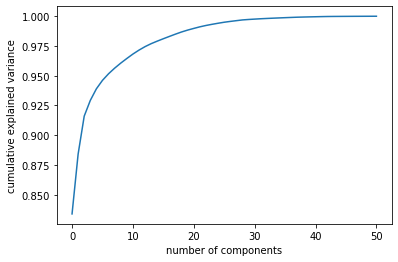

In [ ]:
# try apply PCA without scaling
pca = PCA(n_components=51).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The above method is not adopted even if the explained varaince converges faster than the below result. Because without scaling, varaibles with larger varaince and range are weighted heavier compared to the ones with smaller range and varaince

Text(0, 0.5, 'cumulative explained variance')

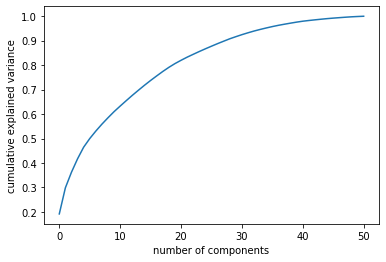

In [ ]:
# run pca on rescaled training data
pca = PCA(n_components=51).fit(rescaledX)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# explained variance of every principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19201936, 0.10665786, 0.06362204, 0.05480982, 0.04749794,
       0.03517377, 0.03058652, 0.02827926, 0.02615267, 0.0249607 ,
       0.02276352, 0.02216333, 0.02174378, 0.02082996, 0.02039519,
       0.01948894, 0.0185941 , 0.01810813, 0.01691551, 0.01527016,
       0.01350824, 0.01274892, 0.01167581, 0.01149239, 0.01099911,
       0.01067001, 0.01045394, 0.00994149, 0.00984518, 0.00861516,
       0.00829957, 0.00761597, 0.00722807, 0.00645572, 0.00602374,
       0.00567484, 0.005156  , 0.0045609 , 0.00434832, 0.00416343,
       0.00370105, 0.0028994 , 0.00268062, 0.00254597, 0.00240235,
       0.00206183, 0.00189332, 0.0018207 , 0.00162875, 0.0012545 ,
       0.00108589])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.19201936, 0.29867721, 0.36229925, 0.41710908, 0.46460701,
       0.49978078, 0.5303673 , 0.55864656, 0.58479923, 0.60975993,
       0.63252345, 0.65468678, 0.67643056, 0.69726052, 0.71765571,
       0.73714465, 0.75573874, 0.77384687, 0.79076238, 0.80603254,
       0.81954077, 0.83228969, 0.8439655 , 0.8554579 , 0.866457  ,
       0.87712701, 0.88758095, 0.89752245, 0.90736763, 0.91598279,
       0.92428236, 0.93189833, 0.9391264 , 0.94558212, 0.95160586,
       0.9572807 , 0.9624367 , 0.9669976 , 0.97134592, 0.97550936,
       0.97921041, 0.98210981, 0.98479043, 0.9873364 , 0.98973875,
       0.99180058, 0.9936939 , 0.9955146 , 0.99714335, 0.99839785,
       0.99948374])

In [ ]:
# get the training data for modeling
X_pca = pca.transform(rescaledX)

# KNN Modeling

In [ ]:
#fit and transform training data with pca
pca_model = PCA(n_components=15)
pca_model.fit(rescaledX)
x_train_15 = pca_model.transform(x_train)
x_test_15 = pca_model.transform(x_test)


n_components=15 is selected, because we found when n_components>=10, the model performance does not vary a lot as n_components increases.
So we took n_components=15 for acceptable performance and computational time

In [ ]:
#optimal k value selection
k_values=np.arange(1,101) 

In [ ]:
#set number of kfold = 5
num_folds = 5
scoring = 'neg_mean_squared_error'

In [ ]:
test_size = 0.2
seed = 42

In [ ]:
#k folders with random values after shuffling
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [ ]:
kfold.get_n_splits(X_pca)

5

In [ ]:
print(kfold)

KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
for train_index, validate_index in kfold.split(X_pca):
    print("TRAIN:", train_index, "VALIDATE:", validate_index)

TRAIN: [    0     1     2 ... 21301 21302 21304] VALIDATE: [    3     6    17 ... 21293 21295 21303]
TRAIN: [    1     2     3 ... 21302 21303 21304] VALIDATE: [    0     5     8 ... 21284 21292 21294]
TRAIN: [    0     1     3 ... 21302 21303 21304] VALIDATE: [    2     7    10 ... 21299 21300 21301]
TRAIN: [    0     2     3 ... 21302 21303 21304] VALIDATE: [    1     4    12 ... 21283 21289 21298]
TRAIN: [    0     1     2 ... 21300 21301 21303] VALIDATE: [    9    11    13 ... 21297 21302 21304]


In [ ]:
model=KNeighborsRegressor()

In [ ]:
cv_results = cross_val_score(model,x_train_15, y_train,cv=kfold,scoring=scoring)

In [ ]:
cv_results

array([-0.18520535, -0.19395447, -0.18498944, -0.18942032, -0.18770242])

In [ ]:
msg = "KNN: %f (%f)" % (cv_results.mean(),cv_results.std())
print(msg)

KNN: -0.188254 (0.003290)


In [ ]:
param_grid=dict(n_neighbors=k_values)

In [ ]:
model=KNeighborsRegressor()

In [ ]:
kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)

In [ ]:
#add cv after finalizing everything
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring, cv=kfold)

In [ ]:
grid_result=grid.fit(x_train_15,y_train)

In [ ]:
#look for k value with the optimal negative mse
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best: -0.164113 using {'n_neighbors': 97}


In [ ]:
#print out neg_mse, std for each k
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-0.306595 (0.006571) with: {'n_neighbors': 1}
-0.232398 (0.006242) with: {'n_neighbors': 2}
-0.206832 (0.003933) with: {'n_neighbors': 3}
-0.195485 (0.003536) with: {'n_neighbors': 4}
-0.188254 (0.003290) with: {'n_neighbors': 5}
-0.183065 (0.003264) with: {'n_neighbors': 6}
-0.179580 (0.003188) with: {'n_neighbors': 7}
-0.177030 (0.003037) with: {'n_neighbors': 8}
-0.175081 (0.003709) with: {'n_neighbors': 9}
-0.173270 (0.003933) with: {'n_neighbors': 10}
-0.172270 (0.003436) with: {'n_neighbors': 11}
-0.171040 (0.003169) with: {'n_neighbors': 12}
-0.170103 (0.003001) with: {'n_neighbors': 13}
-0.169504 (0.003231) with: {'n_neighbors': 14}
-0.169103 (0.003332) with: {'n_neighbors': 15}
-0.168523 (0.003385) with: {'n_neighbors': 16}
-0.168087 (0.003310) with: {'n_neighbors': 17}
-0.167855 (0.003270) with: {'n_neighbors': 18}
-0.167452 (0.003058) with: {'n_neighbors': 19}
-0.167126 (0.002967) with: {'n_neighbors': 20}
-0.166886 (0.003004) with: {'n_neighbors': 21}
-0.166569 (0.002853) w

k=97 gives us the maximimum negative mse, yet it is a fairly large value. Considering the size of our training set and the compromise between performance and efficiency, we can select the elbow point as our final k selection

In [ ]:
#find a proper elbow point for k
k_df = pd.DataFrame({'neg_mse': means, 'k': params}, columns=['neg_mse', 'k'])

In [ ]:
k_df['pct_change'] = 0
for i in range(1,len(k_df)):
  k_df.iloc[i,2] = '{:.2%}'.format(abs((k_df.iloc[i,0] - k_df.iloc[i-1,0]) / k_df.iloc[i-1,0]))

In [ ]:
k_df

,neg_mse,k,pct_change
0,-0.306595,{'n_neighbors': 1},0
1,-0.232398,{'n_neighbors': 2},24.20%
2,-0.206832,{'n_neighbors': 3},11.00%
3,-0.195485,{'n_neighbors': 4},5.49%
4,-0.188254,{'n_neighbors': 5},3.70%
5,-0.183065,{'n_neighbors': 6},2.76%
6,-0.179580,{'n_neighbors': 7},1.90%
7,-0.177030,{'n_neighbors': 8},1.42%
8,-0.175081,{'n_neighbors': 9},1.10%
9,-0.173270,{'n_neighbors': 10},1.03%


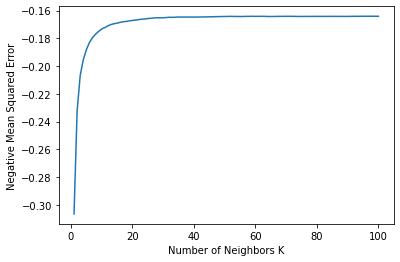

In [ ]:
#plot the result
plt.plot(k_values,means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

In [ ]:
#use the optimal k to build final model
k = 12

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train_15, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
y_predict = knn_model.predict(x_test_15)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
acc = accuracy_score(y_test, y_predict)
acc

0.7696639759714661

In [ ]:
classification_matrix= confusion_matrix(y_test, y_predict)
classification_matrix

array([[ 649,  838],
       [ 389, 3451]])

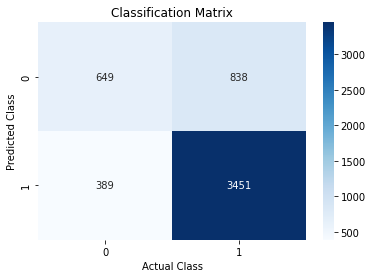

In [ ]:
# confusion matrix plot
sns.heatmap(classification_matrix,annot=True, cmap='Blues', fmt='g')
plt.title('Classification Matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()  

In [ ]:
#precision TP / (TP + FP)
precision_score(y_test, y_predict)

0.804616460713453

In [ ]:
#Recall (Sensitivity) TP / (TP + FN) 
recall_score(y_test, y_predict)

0.8986979166666667

In [ ]:
# f1 score TP/(TP + 0.5(FN+FP))
f1_score(y_test, y_predict)

0.8490589248370033